<a href="https://colab.research.google.com/github/manekgnath/Machine-Learning/blob/main/ML_project_3_Linear_Regression_Insurance%26HR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [ ]:
y = df['bought_insurance']
x = df.drop('bought_insurance',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred = model.predict(x_test)
ypred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
y_predicted = model.predict_proba(x_test)
y_predicted[:5]

array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731]])

In [ ]:
model.coef_

array([[0.11216016]])

In [ ]:
model.intercept_

array([-4.60960684])

In [ ]:
import numpy as np
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def predict_with_ml(age):
  weight_sum = age*0.11216016-4.60960684
  return sigmoid(weight_sum)

In [ ]:
predict_with_ml(64)

0.9288160540372414

#HR Data analyisis and prediction

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
df['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df['Department'].value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
df = pd.get_dummies(df,columns=['Department'],drop_first = True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,low,False,False,False,False,False,False,False,True,False


In [ ]:
df['salary'] = df['salary'].map({'low':0,'medium':1,'high':2})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,0,False,False,False,False,False,False,False,True,False


In [ ]:
y = df['salary']
x = df.drop('salary',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 1])

In [ ]:
y_test[:5]

,salary
7231,0
12081,0
5364,2
14589,1
2353,0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1102,  358,   15],
       [ 896,  366,   17],
       [ 136,   73,   37]])

<Axes: >

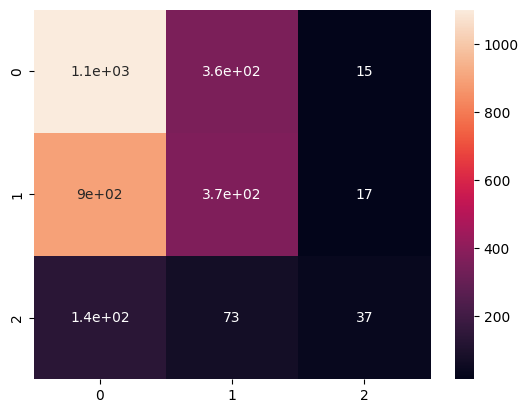

In [ ]:
import seaborn as sns
#ax = plt.subplot()
sns.heatmap(cm,annot=True)#,ax=ax
#labels = ['low','medium','high']
#ax.set_xticklabels(labels)
#ax.set_yticklabels(labels)

#ax.set_xlabel('Predicted labels')
#ax.set_ylabel('True labels')
#ax.set_title('Confusion Matrix')


Text(0.5, 1.0, 'Confusion Matrix')

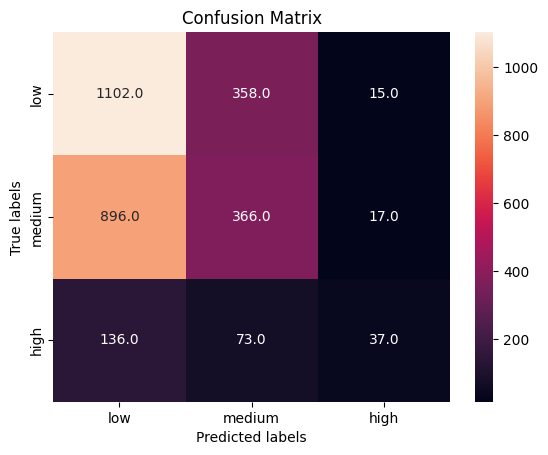

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt ='.1f')
labels = ['low','medium','high']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
accuracy_score(y_test,y_pred)

0.5016666666666667

In [ ]:
data = pd.read_csv('/content/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data = data.drop(['Timestamp','Country','City'],axis = 1)

KeyError: "['Timestamp', 'Country', 'City'] not found in axis"

In [ ]:
data = data.drop(['Ad Topic Line'],axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [ ]:
y = data['Clicked on Ad']
x = data.drop('Clicked on Ad',axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 1, 0])

In [ ]:
y_test[:5 ]

,Clicked on Ad
993,0
859,0
298,0
553,1
672,0


In [ ]:
y_predction = model.predict_proba(x_test)
y_predction

array([[9.76486363e-01, 2.35136371e-02],
       [9.87241736e-01, 1.27582641e-02],
       [9.90739564e-01, 9.26043587e-03],
       [7.83409132e-04, 9.99216591e-01],
       [9.54160102e-01, 4.58398981e-02],
       [2.08509945e-05, 9.99979149e-01],
       [3.30995589e-04, 9.99669004e-01],
       [1.59037653e-04, 9.99840962e-01],
       [9.89989984e-01, 1.00100158e-02],
       [8.61807427e-02, 9.13819257e-01],
       [9.92791373e-01, 7.20862746e-03],
       [8.46815127e-01, 1.53184873e-01],
       [3.45174716e-04, 9.99654825e-01],
       [9.93625794e-01, 6.37420642e-03],
       [9.65550422e-01, 3.44495776e-02],
       [9.39988883e-01, 6.00111170e-02],
       [1.81820169e-03, 9.98181798e-01],
       [9.86167331e-01, 1.38326694e-02],
       [7.79050852e-05, 9.99922095e-01],
       [9.94556330e-01, 5.44366983e-03],
       [9.73035261e-01, 2.69647386e-02],
       [9.66521656e-01, 3.34783437e-02],
       [9.92826728e-01, 7.17327190e-03],
       [9.23457432e-01, 7.65425678e-02],
       [3.281130

In [ ]:
accuracy_score(y_test,y_pred)

0.98

In [ ]:
confusion_matrix(y_test,y_pred)

array([[107,   1],
       [  3,  89]])